## Context

Let an initial-value problem be specified as follows:

$$
y'(t) = f(t, y),\qquad y(t_0) = y_0.\qquad (1)
$$
Here $y \in \mathbb{R}^m$ is an unknown function of time $t$.

We will consider a naive Julia implementation of the famous fourth-order explicit [Runge-Kutta integration method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods). The idea is to use such method to solve (1) for the case when $y_0$ is defined symbolically in the sense that we replace $y_0$ by $y_0 + \xi$ where $\xi$ is a vector of $m$ "symbols". We would like to evaluate how does the classic RK4 method propagate the $\xi$ and see what information can be extracted from such expansion.

In this method, given a step size $h > 0$ we compute for each $n = 0, 1, 2, \ldots, N$ a sequence $y_1, y_2, \ldots, y_N$ using an explicit scheme of the form $y_{n+1} = y_n + h \sum_{i=1}^s b_i k_i$, where the $k_i$ are obtained by evaluating $f(t, y)$ on intermediate points. In the case of RK4 one step of the algorithm is obtained with the following `step` function.

In [1]:
function step!(f, y, n, t, h)
    k₁ = f(t[n], y[n])
    k₂ = f(t[n] + h/2, y[n] + h*k₁/2)
    k₃ = f(t[n] + h/2, y[n] + h*k₂/2)
    k₄ = f(t[n] + h, y[n] + h*k₃)

    y[n+1] = y[n] + (h/6) * (k₁ + 2k₂ + 2k₃ + k₄)
    t[n+1] = t[n] + h
end

step! (generic function with 1 method)

In [2]:
function solve(f, h, t₀, T, y₀)
    N = round(Int, (T - t₀) / h)
    t = Vector{Float64}(undef, N)
    y = Vector{typeof(y₀)}(undef, N)
    y[1] = y₀; t[1] = t₀; 

    for n in 1:N-1
        step!(f, y, n, t, h)
    end
    y, t
end

solve (generic function with 1 method)

## Example

Consider the quadratic ODE

$$
y'(t) = 1 - y^2,\qquad y(t_0) = 0,~~ t \in [0, 10].
$$

We consider a step size $h = 0.01$.

In [3]:
f_quad(t, y) = 1 - y^2

f_quad (generic function with 1 method)

In [4]:
r, t = solve(f_quad, 0.01, 0.0, 10.0, 0.0);

In [5]:
using Plots

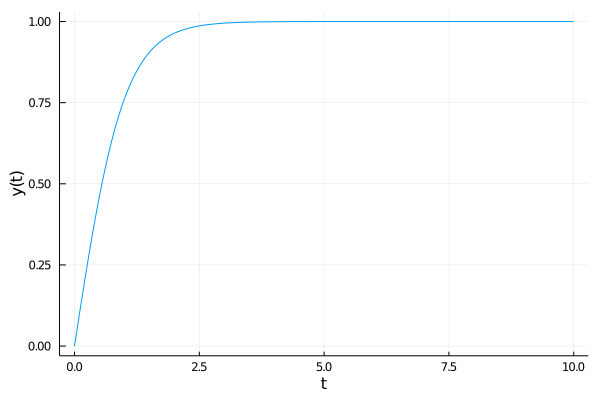

In [6]:
plot(t, r, seriestype=:line, lab="", xlab="t", ylab="y(t)")

Now suppose that we solve the recurrence with an initial state $u_0 + \xi$.

In [7]:
using TaylorSeries

In [8]:
ξ = Taylor1(20)
set_taylor1_varname("ξ")
u0 = 0.0
u0ξ = u0 + ξ

 1.0 ξ + 𝒪(ξ²¹)

In [9]:
y, t = solve(f_quad, 0.01, 0.0, 10.0, u0ξ);

length(y)

1000

In [10]:
y[1]

 1.0 ξ + 𝒪(ξ²¹)

In [11]:
y[2]

 0.009999666679166094 + 0.99990000666625 ξ - 0.009998666787493126 ξ² + 9.998333499990624e-5 ξ³ - 9.997958521864687e-7 ξ⁴ + 9.997916857282813e-9 ξ⁵ - 9.581395992702446e-11 ξ⁶ + 8.331729276038803e-13 ξ⁷ - 6.821796933983367e-15 ξ⁸ + 4.8430989824216484e-17 ξ⁹ - 2.968450528059874e-19 ξ¹⁰ + 1.5103098972005213e-21 ξ¹¹ - 6.119511719889326e-24 ξ¹² + 1.9530794270833342e-26 ξ¹³ - 4.557259114583335e-29 ξ¹⁴ + 6.510416666666671e-32 ξ¹⁵ - 4.069010416666671e-35 ξ¹⁶ + 𝒪(ξ²¹)

In [12]:
y[3]

 0.019997333758263312 + 0.9996001066422828 ξ - 0.019989336973987328 ξ² + 0.0003997334431869484 ξ³ - 7.993594720222507e-6 ξ⁴ + 1.5985124640472037e-7 ξ⁵ - 3.1883090638671063e-9 ξ⁶ + 6.325950825886493e-11 ξ⁷ - 1.2462287616432512e-12 ξ⁸ + 2.4312653056785857e-14 ξ⁹ - 4.687998642014969e-16 ξ¹⁰ + 8.919632391826903e-18 ξ¹¹ - 1.672458814319322e-19 ξ¹² + 3.08748726849809e-21 ξ¹³ - 5.608112595223544e-23 ξ¹⁴ + 1.0018858671317283e-24 ξ¹⁵ - 1.7600522287738262e-26 ξ¹⁶ + 3.040358425374431e-28 ξ¹⁷ - 5.164849498520435e-30 ξ¹⁸ + 8.629961159714198e-32 ξ¹⁹ - 1.4187146313423383e-33 ξ²⁰ + 𝒪(ξ²¹)

In [13]:
y[4]

 0.029991003236316215 + 0.9991005397242128 ξ - 0.02996402754525644 ξ² + 0.000898651247751589 ξ³ - 2.6951439926918567e-5 ξ⁴ + 8.083018387635607e-7 ξ⁵ - 2.4229420975103902e-8 ξ⁶ + 7.255492265663734e-10 ξ⁷ - 2.169261345744115e-11 ξ⁸ + 6.471370059589956e-13 ξ⁹ - 1.9250541717144024e-14 ξ¹⁰ + 5.706694617811968e-16 ξ¹¹ - 1.6849037837381005e-17 ξ¹² + 4.952171150219145e-19 ξ¹³ - 1.4482976068740724e-20 ξ¹⁴ + 4.213120613390775e-22 ξ¹⁵ - 1.2187249982451306e-23 ξ¹⁶ + 3.504794249260267e-25 ξ¹⁷ - 1.0018397840714965e-26 ξ¹⁸ + 2.846156443714574e-28 ξ¹⁹ - 8.035424335081523e-30 ξ²⁰ + 𝒪(ξ²¹)

In [14]:
y[5]

 0.03997868030782012 + 0.9984017051196238 ξ - 0.03991478262103181 ξ² + 0.0015957403355221493 ξ³ - 6.379557597746384e-5 ξ⁴ + 2.550464580022681e-6 ξ⁵ - 1.0194784965344293e-7 ξ⁶ + 4.073770468253297e-9 ξ⁷ - 1.6270188569216327e-10 ξ⁸ + 6.4933229278608814e-12 ξ⁹ - 2.588889266950159e-13 ξ¹⁰ + 1.0309124077397989e-14 ξ¹¹ - 4.099036112193993e-16 ξ¹² + 1.6269963041530542e-17 ξ¹³ - 6.445181115936467e-19 ξ¹⁴ + 2.5476149615176444e-20 ξ¹⁵ - 1.0046100402336236e-21 ξ¹⁶ + 3.9513947849926016e-23 ξ¹⁷ - 1.549979598640151e-24 ξ¹⁸ + 6.062710831558582e-26 ξ¹⁹ - 2.3644194573304648e-27 ξ²⁰ + 𝒪(ξ²¹)

The result is a sequence of polynomials in $\xi$. However such characterization is only useful for small deviations with respect to the initial state -- and we haven't yet characterized the error of the approximation. For example, suppose that we are interested in $y(t = 1)$:

In [15]:
t[100]

0.9900000000000007

In [16]:
y[100]

 0.7573623240820949 + 0.4264023097949346 ξ - 0.3229410443236415 ξ² + 0.24458338018660747 ξ³ - 0.1852382373895675 ξ⁴ + 0.14029246208258747 ξ⁵ - 0.10625222517422822 ξ⁶ + 0.08047143220209468 ξ⁷ - 0.06094603090212832 ξ⁸ + 0.046158227586616425 ξ⁹ - 0.03495850249638864 ξ¹⁰ + 0.026476252672553414 ξ¹¹ - 0.02005211623341677 ξ¹² + 0.015186717331102878 ξ¹³ - 0.01150184751249755 ξ¹⁴ + 0.008711065944387024 ξ¹⁵ - 0.006597433131544507 ξ¹⁶ + 0.004996647273657277 ξ¹⁷ - 0.003784272377387678 ξ¹⁸ + 0.0028660653096264452 ξ¹⁹ - 0.0021706498720577556 ξ²⁰ + 𝒪(ξ²¹)

We can evaluate this result at $\xi = 0$:

In [17]:
evaluate(y[100], 0.0)

0.7573623240820949

At a value $\xi = 0.1$

In [18]:
evaluate(y[100], 0.1)

0.7970005083277867

And also an interval:

In [19]:
using IntervalArithmetic

evaluate(y[100], -0.1 .. 0.1)

[0.711228, 0.800249]

## Flowpipe

In [20]:
using ReachabilityAnalysis
const RA = ReachabilityAnalysis

ReachabilityAnalysis

In [21]:
@taylorize function _f_quad(du, u, p, t)
    du[1] = 1 - u[1]^2
end
prob = @ivp(x' = _f_quad(x), dim=1, x(0) ∈ -0.1 .. 0.1);
sol = RA.solve(prob, tspan=(0.0, 10.0), alg=TMJets(abs_tol=1e-12));

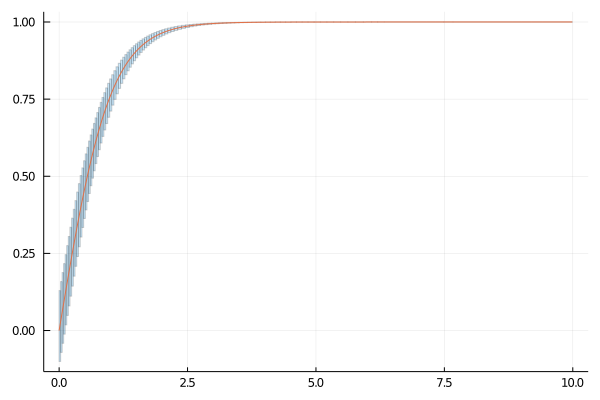

In [22]:
plot(sol, vars=(0, 1), alpha=.2)
plot!(t, r, seriestype=:line, lab="")

In [23]:
R = sol(1.0)

TaylorModelReachSet{Float64}(TaylorModels.TaylorModel1{TaylorN{Float64},Float64}[  0.7549628871907649 + 0.043003103896458415 x₁ - 0.0032465747475834863 x₁² + ( 0.4300310389645844 - 0.06493149495166935 x₁ + 0.003052819945102918 x₁²) ξ + ( - 0.32465747475834694 + 0.03052819945102888 x₁ + 0.0018836179755100605 x₁²) ξ² + ( 0.101760664836763 + 0.012557453170067179 x₁ - 0.00480650040545221 x₁²) ξ³ + ( 0.03139363292516797 - 0.024032502027261038 x₁ + 0.0027912209062894602 x₁²) ξ⁴ + ( - 0.048065004054522104 + 0.011164883625157804 x₁ + 0.0006981330083023078 x₁²) ξ⁵ + ( 0.018608139375263018 + 0.0023271100276743783 x₁ - 0.0020517845820511183 x₁²) ξ⁶ + ( 0.0033244428966776847 - 0.005862241663003196 x₁ + 0.001163377855574074 x₁²) ξ⁷ + ( - 0.007327802078754001 + 0.0029084446389351804 x₁ + 0.0001265493671184609 x₁²) ξ⁸ + [-3.86101e-14, 3.14375e-14]], [0.984396, 1.02463])

In [24]:
tspan(R)

[0.984396, 1.02463]

In [25]:
Z = polynomial.(set(R))

1-element Array{Taylor1{TaylorN{Float64}},1}:
   0.7549628871907649 + 0.043003103896458415 x₁ - 0.0032465747475834863 x₁² + 𝒪(‖x‖³) + ( 0.4300310389645844 - 0.06493149495166935 x₁ + 0.003052819945102918 x₁² + 𝒪(‖x‖³)) ξ + ( - 0.32465747475834694 + 0.03052819945102888 x₁ + 0.0018836179755100605 x₁² + 𝒪(‖x‖³)) ξ² + ( 0.101760664836763 + 0.012557453170067179 x₁ - 0.00480650040545221 x₁² + 𝒪(‖x‖³)) ξ³ + ( 0.03139363292516797 - 0.024032502027261038 x₁ + 0.0027912209062894602 x₁² + 𝒪(‖x‖³)) ξ⁴ + ( - 0.048065004054522104 + 0.011164883625157804 x₁ + 0.0006981330083023078 x₁² + 𝒪(‖x‖³)) ξ⁵ + ( 0.018608139375263018 + 0.0023271100276743783 x₁ - 0.0020517845820511183 x₁² + 𝒪(‖x‖³)) ξ⁶ + ( 0.0033244428966776847 - 0.005862241663003196 x₁ + 0.001163377855574074 x₁² + 𝒪(‖x‖³)) ξ⁷ + ( - 0.007327802078754001 + 0.0029084446389351804 x₁ + 0.0001265493671184609 x₁² + 𝒪(‖x‖³)) ξ⁸ + 𝒪(ξ⁹)

In [26]:
using LazySets
using LazySets: Interval

In [27]:
out = [Singleton([ti]) × Interval(evaluate(yi, -0.1 .. 0.1)) for (ti, yi) in zip(t, y)];

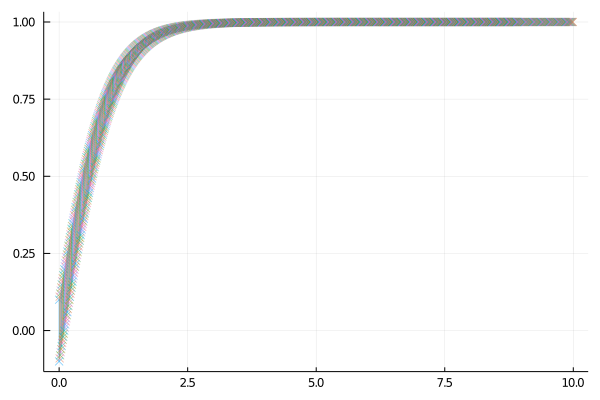

In [28]:
plot(out, marker=:x)

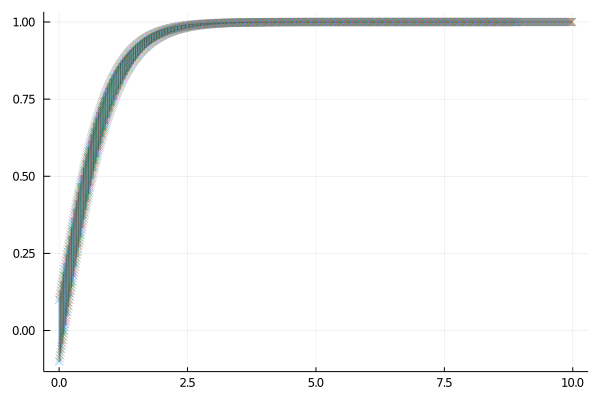

In [29]:
plot!(sol, vars=(0, 1), alpha=.2)

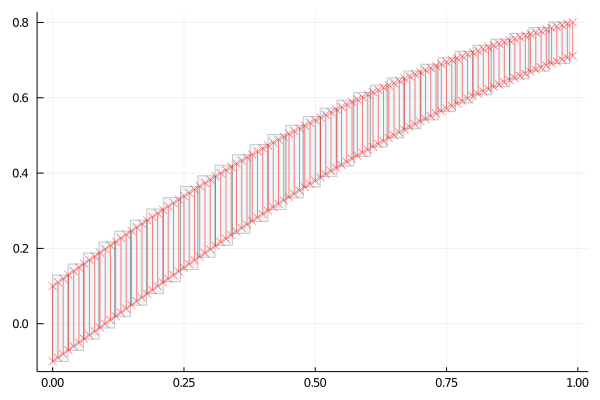

In [30]:
plot(sol[1:30], vars=(0, 1), alpha=.2, c=:lightblue)
plot!(out[1:100], marker=:x, c=:red)